In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error 
from math import sqrt 
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa import arima
import statsmodels.graphics.tsaplots as sgt
from arch import arch_model
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
data = pd.read_excel("imports.xlsx")    # read dataset statement

[Q1] Exploratory analysis and data preparation - 5 Marks

In [3]:
data.head()

,date,y
0,1978-04-24,1659.9
1,1978-04-25,1695.1
2,1978-04-26,1756.7
3,1978-04-27,1842.5
4,1978-04-28,2004.2


In [4]:
data.info()    # data contains 324 rows and 2 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    324 non-null    datetime64[ns]
 1   y       321 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.2 KB


In [5]:
data.isnull().sum()    # 3 Null Values can be seen in y.

date    0
y       3
dtype: int64

In [6]:
data[data.y.isnull()]

,date,y
236,1997-05-02,NaN
241,1998-04-25,NaN
249,1998-05-03,NaN


In [7]:
data.fillna(method = 'ffill', inplace= True)    # Forward filling as a missing value imputation

In [8]:
data.isnull().sum()    # Checking null values again

date    0
y       0
dtype: int64

In [9]:
data[data.y.isnull()]

,date,y


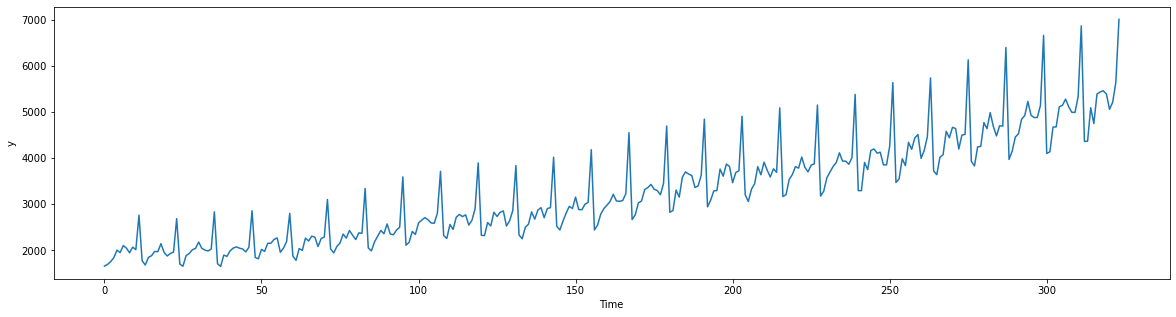

In [10]:
plt.figure(figsize= (20,5))    # ploting the data. 
data["y"].plot()
plt.xlabel('Time')
plt.ylabel('y')
plt.show()

## Inference:
- There is trend and seasonality present in the data.
- The trend is positive and seasonality is high

In [11]:
train = data[:280]    # Splitting as train and test data.
test = data[280:]

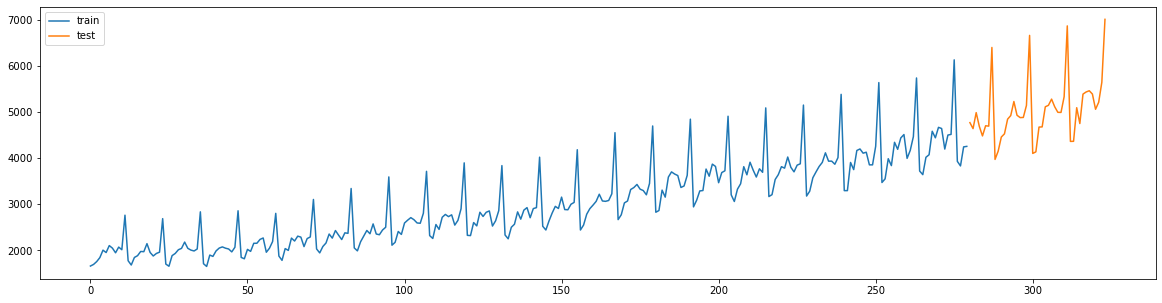

In [12]:
plt.figure(figsize=(20,5))
plt.plot(train["y"], label='train')    # ploting the data date.
plt.plot(test['y'], label='test')
plt.legend(loc='best')
plt.show()

[Q2] Establish benchmarks using basic methods - 10 Marks

## Naive Forecast Method

In [13]:
test["Naive_Forecast"] = train["y"][len(train)-1]
test.head()

,date,y,Naive_Forecast
280,2001-04-28,4768.5,4253.7
281,2001-04-29,4638.7,4253.7
282,2001-04-30,4985.2,4253.7
283,2001-05-01,4686.0,4253.7
284,2001-05-02,4480.3,4253.7


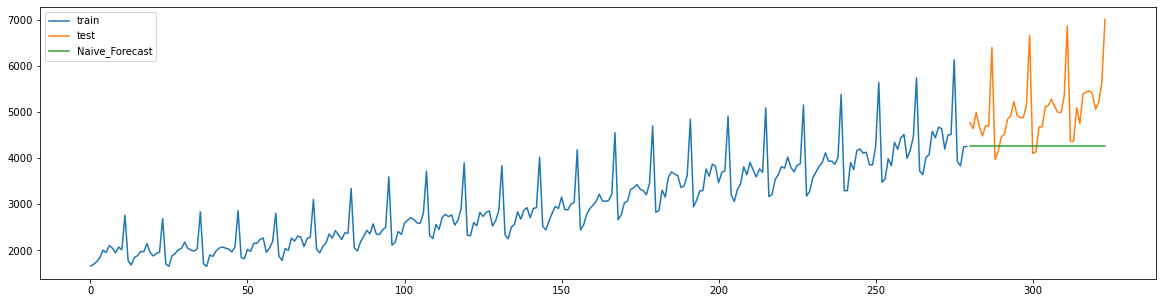

In [14]:
plt.figure(figsize=(20,5))
plt.plot(train["y"], label='train')    # ploting the data date.
plt.plot(test['y'], label='test')
plt.plot(test['Naive_Forecast'], label='Naive_Forecast')
plt.legend(loc='best')
plt.show()

In [15]:
naive_rmse = sqrt(mean_squared_error(test["y"], test["Naive_Forecast"]))
print(naive_rmse)

1024.241840338501


In [16]:
metrics = pd.DataFrame({"Method":pd.Series(["Naive_Forecast"]),"RMSE":pd.Series([naive_rmse])})
metrics

,Method,RMSE
0,Naive_Forecast,1024.24184


## Average Forecast Method

In [17]:
test["Average_Forecast"] = train["y"].mean()
test.head()

,date,y,Naive_Forecast,Average_Forecast
280,2001-04-28,4768.5,4253.7,2991.984286
281,2001-04-29,4638.7,4253.7,2991.984286
282,2001-04-30,4985.2,4253.7,2991.984286
283,2001-05-01,4686.0,4253.7,2991.984286
284,2001-05-02,4480.3,4253.7,2991.984286


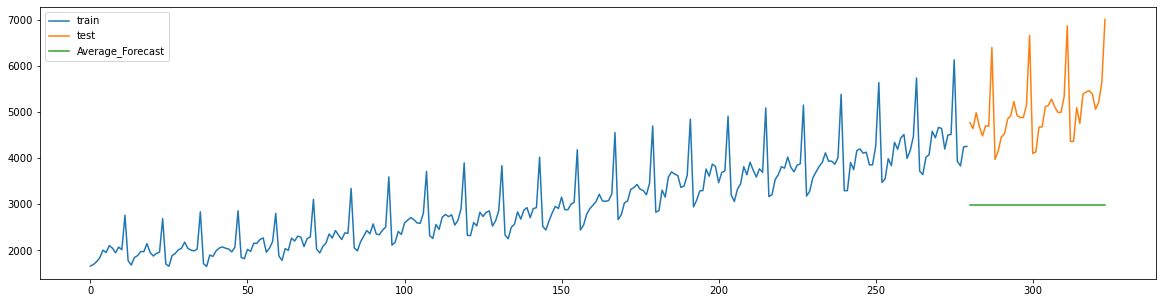

In [18]:
plt.figure(figsize=(20,5))
plt.plot(train["y"], label='train')    # ploting the data date. 
plt.plot(test['y'], label='test')
plt.plot(test['Average_Forecast'], label='Average_Forecast')
plt.legend(loc='best')
plt.show()

In [19]:
average_rmse = sqrt(mean_squared_error(test["y"], test["Average_Forecast"]))
print(average_rmse)

2146.9661531608676


In [20]:
metrics = metrics.append(pd.Series({"Method":"Average Forecast","RMSE":average_rmse}),ignore_index = True)
metrics

,Method,RMSE
0,Naive_Forecast,1024.241840
1,Average Forecast,2146.966153


## Simple Moving Average Method

In [21]:
test["SMA_Forecast"] = train["y"].rolling(30).mean().iloc[-1]
test.head()

,date,y,Naive_Forecast,Average_Forecast,SMA_Forecast
280,2001-04-28,4768.5,4253.7,2991.984286,4331.543333
281,2001-04-29,4638.7,4253.7,2991.984286,4331.543333
282,2001-04-30,4985.2,4253.7,2991.984286,4331.543333
283,2001-05-01,4686.0,4253.7,2991.984286,4331.543333
284,2001-05-02,4480.3,4253.7,2991.984286,4331.543333


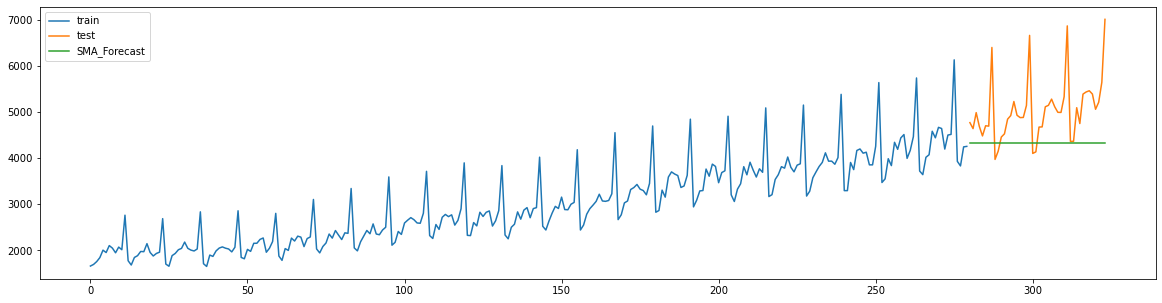

In [22]:
plt.figure(figsize=(20,5))
plt.plot(train["y"], label='train')    # ploting the data date. 
plt.plot(test['y'], label='test')
plt.plot(test['SMA_Forecast'], label='SMA_Forecast')
plt.legend(loc='best')
plt.show()

In [23]:
SMA_rmse = sqrt(mean_squared_error(test["y"], test["SMA_Forecast"]))
print(SMA_rmse)

966.2730750385442


In [24]:
metrics  = metrics.append(pd.Series({"Method":"SMA Forecast","RMSE":SMA_rmse}),ignore_index = True)
metrics

,Method,RMSE
0,Naive_Forecast,1024.241840
1,Average Forecast,2146.966153
2,SMA Forecast,966.273075


[Q3] Apply TF Methods - 20 Marks

## Simple Exponential Smoothing

In [25]:
model1 = SimpleExpSmoothing(np.asarray(train['y'])).fit(optimized=True)
print('optimal alpha chosen:', model1.model.params['smoothing_level'])

optimal alpha chosen: 0.1042229971516779


In [26]:
test["SES_Forecast"] = model1.forecast(len(test))    # Forecasting 
test.head()

,date,y,Naive_Forecast,Average_Forecast,SMA_Forecast,SES_Forecast
280,2001-04-28,4768.5,4253.7,2991.984286,4331.543333,4370.991796
281,2001-04-29,4638.7,4253.7,2991.984286,4331.543333,4370.991796
282,2001-04-30,4985.2,4253.7,2991.984286,4331.543333,4370.991796
283,2001-05-01,4686.0,4253.7,2991.984286,4331.543333,4370.991796
284,2001-05-02,4480.3,4253.7,2991.984286,4331.543333,4370.991796


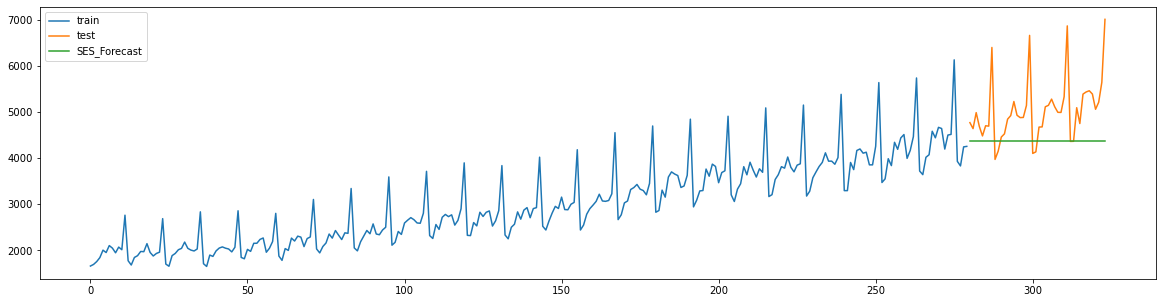

In [27]:
plt.figure(figsize=(20,5))
plt.plot(train["y"], label='train')    # ploting the data date.
plt.plot(test['y'], label='test')
plt.plot(test['SES_Forecast'], label='SES_Forecast')
plt.legend(loc='best')
plt.show()

In [28]:
SES_rmse = sqrt(mean_squared_error(test["y"], test["SES_Forecast"]))
print(SES_rmse)

937.9956913479538


In [29]:
metrics  = metrics.append(pd.Series({"Method":"SES Forecast","RMSE":SES_rmse}),ignore_index = True)
metrics

,Method,RMSE
0,Naive_Forecast,1024.241840
1,Average Forecast,2146.966153
2,SMA Forecast,966.273075
3,SES Forecast,937.995691


## Double Exponential Smoothing

In [30]:
model2 = Holt(np.asanyarray(train['y'])).fit(optimized=True)
test['Holt_linear'] = model2.forecast(len(test))
test.head()

,date,y,Naive_Forecast,Average_Forecast,SMA_Forecast,SES_Forecast,Holt_linear
280,2001-04-28,4768.5,4253.7,2991.984286,4331.543333,4370.991796,4532.630311
281,2001-04-29,4638.7,4253.7,2991.984286,4331.543333,4370.991796,4546.720636
282,2001-04-30,4985.2,4253.7,2991.984286,4331.543333,4370.991796,4560.810961
283,2001-05-01,4686.0,4253.7,2991.984286,4331.543333,4370.991796,4574.901285
284,2001-05-02,4480.3,4253.7,2991.984286,4331.543333,4370.991796,4588.991610


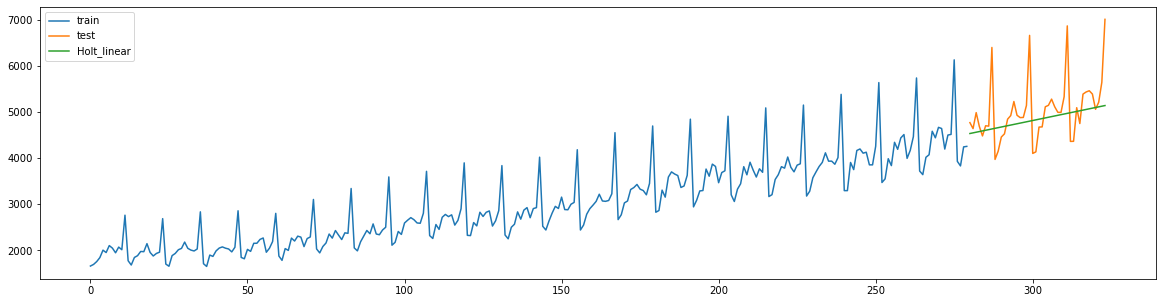

In [31]:
plt.figure(figsize=(20,5))
plt.plot(train["y"], label='train')    # ploting the data date. 
plt.plot(test['y'], label='test')
plt.plot(test['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [32]:
DES_rmse = sqrt(mean_squared_error(test["y"], test["Holt_linear"]))
print(DES_rmse)

646.612240240796


In [33]:
metrics  = metrics.append(pd.Series({"Method":"DES Forecast","RMSE":DES_rmse}),ignore_index = True)
metrics

,Method,RMSE
0,Naive_Forecast,1024.241840
1,Average Forecast,2146.966153
2,SMA Forecast,966.273075
3,SES Forecast,937.995691
4,DES Forecast,646.612240


## Triple Exponential Smoothing

In [34]:
model3 = ExponentialSmoothing(np.asarray(train['y']), seasonal_periods=12, trend='add', seasonal='mul')

In [35]:
fit1 = model3.fit(optimized=True)
test['TES_add_mul'] = fit1.forecast(len(test))
test.head()

,date,y,Naive_Forecast,Average_Forecast,SMA_Forecast,SES_Forecast,Holt_linear,TES_add_mul
280,2001-04-28,4768.5,4253.7,2991.984286,4331.543333,4370.991796,4532.630311,4702.951957
281,2001-04-29,4638.7,4253.7,2991.984286,4331.543333,4370.991796,4546.720636,4630.600679
282,2001-04-30,4985.2,4253.7,2991.984286,4331.543333,4370.991796,4560.810961,4827.730409
283,2001-05-01,4686.0,4253.7,2991.984286,4331.543333,4370.991796,4574.901285,4746.705777
284,2001-05-02,4480.3,4253.7,2991.984286,4331.543333,4370.991796,4588.991610,4430.502413


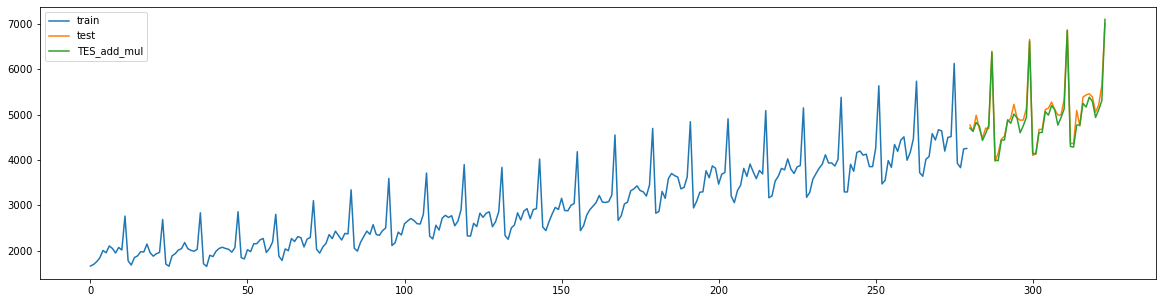

In [36]:
plt.figure(figsize=(20,5))
plt.plot(train["y"], label='train')    # ploting the data date.
plt.plot(test['y'], label='test')
plt.plot(test['TES_add_mul'], label='TES_add_mul')
plt.legend(loc='best')
plt.show()

In [37]:
TES_rmse = sqrt(mean_squared_error(test["y"], test["TES_add_mul"]))
print(TES_rmse)

134.01261899773309


In [38]:
metrics  = metrics.append(pd.Series({"Method":"TES Forecast","RMSE":TES_rmse}),ignore_index = True)
metrics

,Method,RMSE
0,Naive_Forecast,1024.241840
1,Average Forecast,2146.966153
2,SMA Forecast,966.273075
3,SES Forecast,937.995691
4,DES Forecast,646.612240
5,TES Forecast,134.012619


## Stationary test

In [39]:
data2 = data.copy()

In [40]:
result = adfuller(data2["y"])    #ADF test
print('ADF Statistic: %f' % result[0])    # Stationarity Test
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.043860
p-value: 1.000000
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572


In [41]:
data2["Diff_y"] = data2["y"].diff()    # difference once
diff_values = data2["Diff_y"].values
y_diff = diff_values[~np.isnan(diff_values)]
y = y_diff

In [42]:
data2.head()

,date,y,Diff_y
0,1978-04-24,1659.9,NaN
1,1978-04-25,1695.1,35.2
2,1978-04-26,1756.7,61.6
3,1978-04-27,1842.5,85.8
4,1978-04-28,2004.2,161.7


In [43]:
result = adfuller(data2["Diff_y"][1:])    #ADF test
print('ADF Statistic: %f' % result[0])    # Stationarity Test
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.451448
p-value: 0.009325
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572


In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

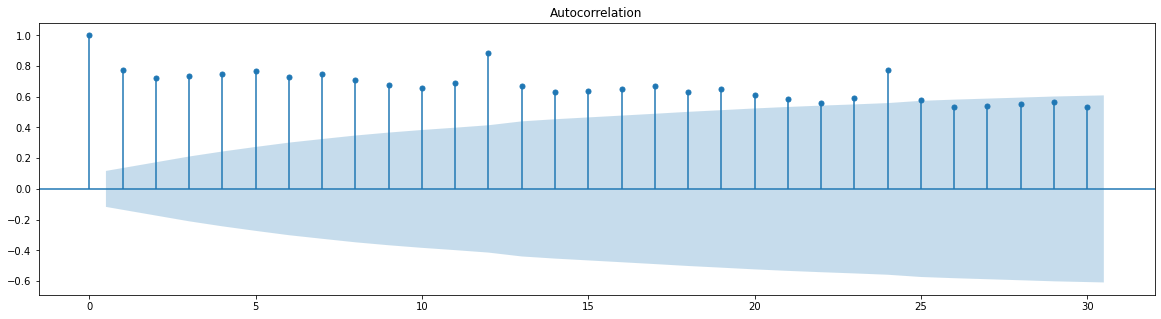

In [45]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (20, 5)
plot_acf(train['y'], lags=30);

## ARIMA

In [46]:
stepwise_fit = auto_arima(train["y"], start_p = 0, 
                          start_q = 0, max_p = 3, max_q = 3,     # grid search and find best parameters
                          m = 12, start_P = 0, max_P = 3,seasonal = True,
                          start_Q = 0, max_Q = 3,d = 1, D = 0, trace = True, 
                          error_action ='ignore',    # we don't want to know if an order does not work 
                           suppress_warnings = True,    # we don't want convergence warnings 
                          information_criterion='aic',
                          stepwise = True)    # set to stepwise 

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4356.704, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3901.867, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4354.775, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=4171.894, Time=0.32 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=3393.547, Time=1.58 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=3370.959, Time=1.27 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=3455.143, Time=2.24 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=2.43 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=3367.899, Time=1.44 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=4173.810, Time=0.69 sec
 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=3370.749, Time=3.04 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : A

In [47]:
stepwise_fit.summary()    # To print the summary 
model4 = arima.model.ARIMA(train["y"], order=(0,1,2), seasonal_order=(1,0,2,12))    # use the recommended fit
model_fitted = model4.fit()
model_fitted.params
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  280
Model:             ARIMA(0, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1963.570
Date:                          Sun, 24 Jul 2022   AIC                           3939.141
Time:                                  11:51:39   BIC                           3960.928
Sample:                                       0   HQIC                          3947.880
                                          - 280                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6400      0.102     -6.276      0.000      -0.840      -0.440
ma.L2          0.5009      0.103      4.861      0.000       0.299       0.703
ar.S.L12       0.9996      0.007    153.000      0.000       0.987       1.012
ma.S.L12      -0.7458      0.246     -3.035      0.002      -1.227      -0.264
ma.S.L24      -0.2343      0.196     -1.196      0.232      -0.618       0.150
sigma2      1.237e+05   9.66e-07   1.28e+11      0.000    1.24e+05    1.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.54   Jarque-Bera (JB):                 1.92
Prob(Q):                              0.03   Prob(JB):                         0.38
Heteroskedasticity (H):               1.61   Skew:                            -0.15
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.98e+27. Standard errors may be unstable.
"""

In [48]:
test["ARIMA_Forecast"] = list(model_fitted.forecast(steps=len(test)))
test.head()

,date,y,Naive_Forecast,Average_Forecast,SMA_Forecast,SES_Forecast,Holt_linear,TES_add_mul,ARIMA_Forecast
280,2001-04-28,4768.5,4253.7,2991.984286,4331.543333,4370.991796,4532.630311,4702.951957,4350.937059
281,2001-04-29,4638.7,4253.7,2991.984286,4331.543333,4370.991796,4546.720636,4630.600679,4424.570690
282,2001-04-30,4985.2,4253.7,2991.984286,4331.543333,4370.991796,4560.810961,4827.730409,4561.981035
283,2001-05-01,4686.0,4253.7,2991.984286,4331.543333,4370.991796,4574.901285,4746.705777,4498.300700
284,2001-05-02,4480.3,4253.7,2991.984286,4331.543333,4370.991796,4588.991610,4430.502413,4294.999495


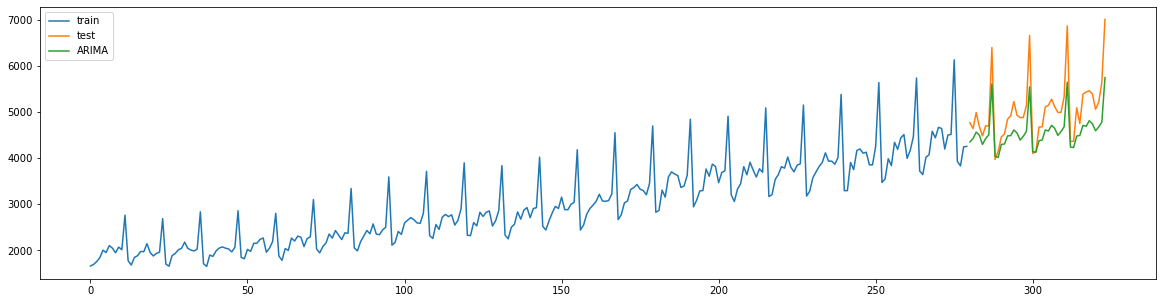

In [49]:
plt.figure(figsize=(20,5))
plt.plot(train["y"], label='train')    # ploting the data date.
plt.plot(test['y'], label='test')
plt.plot(test['ARIMA_Forecast'], label='ARIMA')
plt.legend(loc='best')
plt.show()

In [50]:
ARIMA_rmse = sqrt(mean_squared_error(test["y"], test["ARIMA_Forecast"]))
print(ARIMA_rmse)

541.4745402767343


In [51]:
metrics  = metrics.append(pd.Series({"Method":"ARIMA Forecast","RMSE":ARIMA_rmse}),ignore_index = True)
metrics

,Method,RMSE
0,Naive_Forecast,1024.241840
1,Average Forecast,2146.966153
2,SMA Forecast,966.273075
3,SES Forecast,937.995691
4,DES Forecast,646.612240
5,TES Forecast,134.012619
6,ARIMA Forecast,541.474540


## SARIMA

In [52]:
stepwise_fit = auto_arima(train['y'], start_p=0, start_q=0,max_p=3,m=12, max_q=3,start_P=0, seasonal=True,d=None, D=1, trace=True,
                          error_action='ignore',suppress_warnings=True,stepwise=True)  

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3329.378, Time=0.31 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3328.776, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3231.816, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3170.656, Time=0.42 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3182.772, Time=0.15 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3161.264, Time=0.74 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3176.957, Time=0.35 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=3157.760, Time=1.49 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=3171.726, Time=0.74 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=4.49 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=3160.719, Time=1.96 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=3290.635, Time=1.26 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=3156.239, Time=2.09 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3157.722, Time=0.88 sec
 ARIMA(1,1,1)(2,1,0)[12]

In [53]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  280
Model:             SARIMAX(2, 1, 3)x(1, 1, [], 12)   Log Likelihood               -1541.304
Date:                             Sun, 24 Jul 2022   AIC                           3096.609
Time:                                     11:54:02   BIC                           3121.720
Sample:                                          0   HQIC                          3106.696
                                             - 280                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1537      0.010   -111.083      0.000      -1.174      -1.133
ar.L2         -0.9952      0.008   -125.823      0.000      -1.011      -0.980
ma.L1          0.3901      0.063      6.229      0.000       0.267       0.513
ma.L2          0.2043      0.074      2.755      0.006       0.059       0.350
ma.L3         -0.6713      0.064    -10.560      0.000      -0.796      -0.547
ar.S.L12      -0.3152      0.079     -3.993      0.000      -0.470      -0.161
sigma2      7058.1270    716.285      9.854      0.000    5654.235    8462.019
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 2.33
Prob(Q):                              0.78   Prob(JB):                         0.31
Heteroskedasticity (H):               1.68   Skew:                             0.21
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
model5 = SARIMAX(train['y'],order=(2,1,3),seasonal_order=(1,1,0,12))    # use the recommended fit
model_fitted1 = model5.fit()
model_fitted1.params
model_fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  280
Model:             SARIMAX(2, 1, 3)x(1, 1, [], 12)   Log Likelihood               -1541.304
Date:                             Sun, 24 Jul 2022   AIC                           3096.609
Time:                                     11:54:04   BIC                           3121.720
Sample:                                          0   HQIC                          3106.696
                                             - 280                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1537      0.010   -111.083      0.000      -1.174      -1.133
ar.L2         -0.9952      0.008   -125.823      0.000      -1.011      -0.980
ma.L1          0.3901      0.063      6.229      0.000       0.267       0.513
ma.L2          0.2043      0.074      2.755      0.006       0.059       0.350
ma.L3         -0.6713      0.064    -10.560      0.000      -0.796      -0.547
ar.S.L12      -0.3152      0.079     -3.993      0.000      -0.470      -0.161
sigma2      7058.1270    716.285      9.854      0.000    5654.235    8462.019
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 2.33
Prob(Q):                              0.78   Prob(JB):                         0.31
Heteroskedasticity (H):               1.68   Skew:                             0.21
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
test["SARIMA_Forecast"] = list(model_fitted1.forecast(steps=len(test)))
test.head()

,date,y,Naive_Forecast,Average_Forecast,SMA_Forecast,SES_Forecast,Holt_linear,TES_add_mul,ARIMA_Forecast,SARIMA_Forecast
280,2001-04-28,4768.5,4253.7,2991.984286,4331.543333,4370.991796,4532.630311,4702.951957,4350.937059,4693.604668
281,2001-04-29,4638.7,4253.7,2991.984286,4331.543333,4370.991796,4546.720636,4630.600679,4424.570690,4619.273533
282,2001-04-30,4985.2,4253.7,2991.984286,4331.543333,4370.991796,4560.810961,4827.730409,4561.981035,4887.834327
283,2001-05-01,4686.0,4253.7,2991.984286,4331.543333,4370.991796,4574.901285,4746.705777,4498.300700,4782.235552
284,2001-05-02,4480.3,4253.7,2991.984286,4331.543333,4370.991796,4588.991610,4430.502413,4294.999495,4407.592070


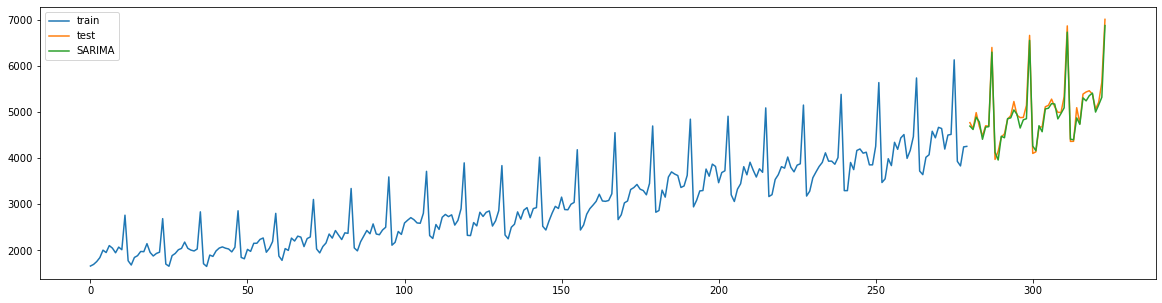

In [56]:
plt.figure(figsize=(20,5))
plt.plot(train["y"], label='train')    # ploting the data date.
plt.plot(test['y'], label='test')
plt.plot(test['SARIMA_Forecast'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [57]:
SARIMA_rmse = sqrt(mean_squared_error(test["y"], test["SARIMA_Forecast"]))
print(SARIMA_rmse)

124.94401691631775


In [58]:
metrics  = metrics.append(pd.Series({"Method":"SARIMA Forecast","RMSE":SARIMA_rmse}),ignore_index = True)
metrics

,Method,RMSE
0,Naive_Forecast,1024.241840
1,Average Forecast,2146.966153
2,SMA Forecast,966.273075
3,SES Forecast,937.995691
4,DES Forecast,646.612240
5,TES Forecast,134.012619
6,ARIMA Forecast,541.474540
7,SARIMA Forecast,124.944017


## Analysis:
- Best model is SARIMA with least RMSE of 124.944.
- This is because SARIMA just has an additional component of seasonality in it when compared to ARIMA.
- Second best model is Triple Exponential Smoothing with second least RMSE 134.012.
- This is because the TES method can capture all level, trend and seasonality present in the data when compared to other Exponential methods.